In [1]:
pip install --upgrade tensorflow

   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 1.0/385.2 MB 6.3 MB/s eta 0:01:02
   ---------------------------------------- 3.1/385.2 MB 8.0 MB/s eta 0:00:48
    --------------------------------------- 5.5/385.2 MB 9.1 MB/s eta 0:00:42
    --------------------------------------- 7.9/385.2 MB 9.7 MB/s eta 0:00:39
   - -------------------------------------- 9.7/385.2 MB 9.7 MB/s eta 0:00:39
   - -------------------------------------- 11.5/385.2 MB 9.6 MB/s eta 0:00:39
   - -------------------------------------- 13.6/385.2 MB 9.6 MB/s eta 0:00:39
   - -------------------------------------- 15.5/385.2 MB 9.5 MB/s eta 0:00:39
   - -------------------------------------- 17.6/385.2 MB 9.5 MB/s eta 0:00:39
   -- ------------------------------------- 19.7/385.2 MB 9.7 MB/s eta 0:00:38
   -- ------------------------------------- 21.8/385.2 MB 9.7 MB/s eta 0:00:38
   -- ------------------------------------- 23.9/385.2 MB 9.7 MB/

In [2]:
pip install --upgrade keras

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ------------------------------------ --- 1.0/1.1 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 3.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt#to plot accuracy
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split #to split training and testing data
from keras.utils import to_categorical#to convert the labels present in y_train and t_test into one-hot encoding
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout#to create CNN

In [8]:
DATA = []
classes = 23
DATA_PATH = r"C:\Users\allab\Desktop\Voice Based Traffic Sign Recognition Using Deep Learning\OriginalTrafficSignData"
os.chdir(DATA_PATH)
cur_path = os.getcwd()

In [10]:
#Retrieving the images and their labels
for label in range(classes):
    print("Reading label " + str(label) + " data...")
    path = os.path.join(cur_path,str(label))
    images = os.listdir(path)
    for img in images:
        try:
            image = Image.open(path + '/'+ img)
            image = image.convert('RGB')
            image = image.resize((30,30))
            image = np.expand_dims(image, axis=0)
            image = np.array(image)
            DATA.append([image, label])
        except:
            print("Error loading image")
    print("Reading label " + str(label) + " data completed.")
    

Reading label 0 data...
Reading label 0 data completed.
Reading label 1 data...
Reading label 1 data completed.
Reading label 2 data...
Reading label 2 data completed.
Reading label 3 data...
Reading label 3 data completed.
Reading label 4 data...
Reading label 4 data completed.
Reading label 5 data...
Reading label 5 data completed.
Reading label 6 data...
Reading label 6 data completed.
Reading label 7 data...
Reading label 7 data completed.
Reading label 8 data...
Reading label 8 data completed.
Reading label 9 data...
Reading label 9 data completed.
Reading label 10 data...
Reading label 10 data completed.
Reading label 11 data...
Reading label 11 data completed.
Reading label 12 data...
Reading label 12 data completed.
Reading label 13 data...
Reading label 13 data completed.
Reading label 14 data...
Reading label 14 data completed.
Reading label 15 data...
Reading label 15 data completed.
Reading label 16 data...
Reading label 16 data completed.
Reading label 17 data...
Reading l

In [11]:
print(DATA[0][0].shape)
print(len(DATA))

(1, 30, 30, 3)
106106


In [12]:
import pickle as pk
import random

In [14]:
# Define the path
directory = r'C:\Users\allab\Desktop\Voice Based Traffic Sign Recognition Using Deep Learning'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the file path
dumpfile_path = os.path.join(directory, 'dump.pickle')

# Write the data to the file
with open(dumpfile_path, 'wb') as dumpfile:
    pk.dump(DATA, dumpfile)


In [15]:
# Define the path
directory = r'C:\Users\allab\Desktop\Voice Based Traffic Sign Recognition Using Deep Learning'

# Define the file path
dumpfile_path = os.path.join(directory, 'dump.pickle')

# Load the data from the file
with open(dumpfile_path, 'rb') as dumpfile:
    DATA = pk.load(dumpfile)

In [16]:
len(DATA)

106106

In [17]:
print(DATA[0][1])
random.shuffle(DATA)
print(DATA[0][1])

0
9


In [18]:
images = []
labels = []
for image, label in DATA:
    images.append(image)
    labels.append(label)

In [19]:
#Converting lists into numpy arrays
images = np.array(images)
labels = np.array(labels)
print(images.shape, labels.shape)

(106106, 1, 30, 30, 3) (106106,)


In [20]:
# Remove the extra dimension in images
images = np.squeeze(images, axis=1)


In [21]:
# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(84884, 30, 30, 3) (21222, 30, 30, 3) (84884,) (21222,)


In [22]:
#Converting the labels into one hot encoding
num_classes = len(np.unique(labels))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# y_t1 = to_categorical(y_t1, 23)
# y_t2 = to_categorical(y_t2, 23)

In [23]:
# Building the model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(30, 30, 3)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))

# Print model summary
model.summary()

C:\Users\allab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 23)                  │           5,911 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 237,111 (926.21 KB)

 Trainable params: 237,111 (926.21 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
eps = 10
anc = model.fit(X_train, y_train, batch_size=128, epochs=eps, validation_data=(X_test, y_test))

Epoch 1/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 54s 79ms/step - accuracy: 0.2281 - loss: 3.8097 - val_accuracy: 0.7983 - val_loss: 0.7157
Epoch 2/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 53s 81ms/step - accuracy: 0.7458 - loss: 0.7640 - val_accuracy: 0.9715 - val_loss: 0.1182
Epoch 3/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 54s 81ms/step - accuracy: 0.9077 - loss: 0.2917 - val_accuracy: 0.9896 - val_loss: 0.0528
Epoch 4/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 54s 81ms/step - accuracy: 0.9461 - loss: 0.1772 - val_accuracy: 0.9940 - val_loss: 0.0277
Epoch 5/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 53s 79ms/step - accuracy: 0.9577 - loss: 0.1436 - val_accuracy: 0.9932 - val_loss: 0.0248
Epoch 6/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 54s 81ms/step - accuracy: 0.9720 - loss: 0.0945 - val_accuracy: 0.9973 - val_loss: 0.0119
Epoch 7/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 54s 81ms/step - accuracy: 0.9739 - loss: 0.0915 - val_accuracy: 0.9946 - val_loss: 0.0204
Epoch 8/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 54s 81ms/step - accuracy: 0.9774 - loss: 0.0851 - 

In [25]:
model.save(r"C:\Users\allab\Desktop\Voice Based Traffic Sign Recognition Using Deep Learning\new_model.h5")

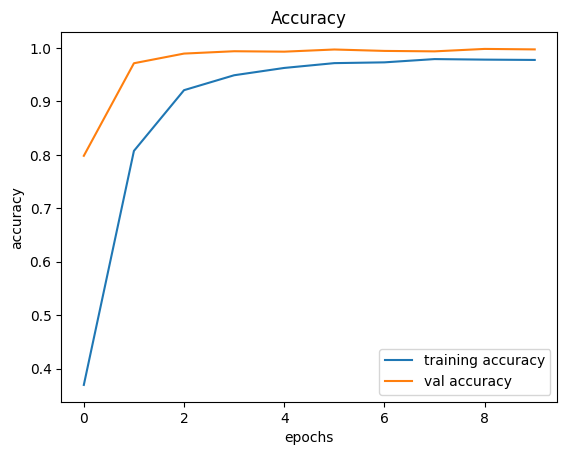

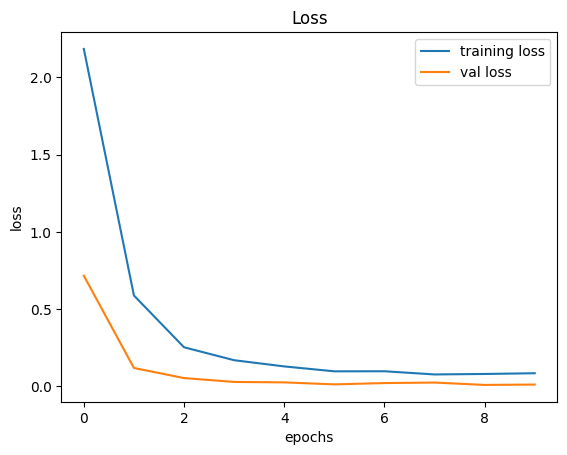

In [26]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [27]:
pip install SpeechRecognition gTTS pyglet

   ---------------------------------------- 0.0/32.8 MB ? eta -:--:--
   -- ------------------------------------- 2.1/32.8 MB 10.7 MB/s eta 0:00:03
   ----- ---------------------------------- 4.2/32.8 MB 11.0 MB/s eta 0:00:03
   ------- -------------------------------- 6.6/32.8 MB 11.2 MB/s eta 0:00:03
   ---------- ----------------------------- 8.9/32.8 MB 11.1 MB/s eta 0:00:03
   ------------- -------------------------- 11.0/32.8 MB 11.1 MB/s eta 0:00:02
   --------------- ------------------------ 13.1/32.8 MB 11.0 MB/s eta 0:00:02
   ------------------- -------------------- 15.7/32.8 MB 11.1 MB/s eta 0:00:02
   ---------------------- ----------------- 18.1/32.8 MB 11.2 MB/s eta 0:00:02
   ------------------------ --------------- 20.4/32.8 MB 11.2 MB/s eta 0:00:02
   --------------------------- ------------ 22.8/32.8 MB 11.2 MB/s eta 0:00:01
   ------------------------------ --------- 25.2/32.8 MB 11.2 MB/s eta 0:00:01
   --------------------------------- ------ 27.5/32.8 MB 11.3 MB/